## **Ce projet a pour objectif de prédire si un client effectuera un dépôt bancaire suite à une campagne marketing. Pour cela, un modèle LSTM (Long Short-Term Memory) sera utilisé, adapté aux données séquentielles. Le jeu de données contient des informations démographiques et comportementales sur les clients. Après un prétraitement incluant l’encodage des variables, le modèle sera entraîné à reconnaître les profils susceptibles de souscrire. Les performances seront évaluées avec des métriques comme la précision et le rappel. Cette approche vise à améliorer les décisions marketing de la banque .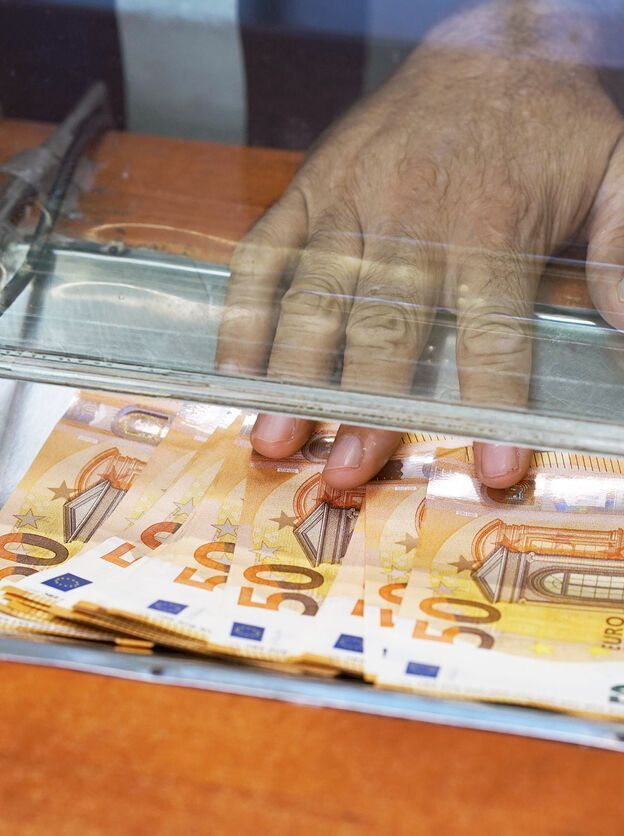**

In [1]:
# Importation des bibliothèques pour traiter et analyser les données
# Utilisation de bibliothèques de deep learning pour créer des modèles
# Ajout d'outils pour les graphiques et la gestion des fichiers
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

In [2]:
# Chargement du fichier CSV 'bank.csv' dans un DataFrame pour analyser les données
df = pd.read_csv('/content/bank.csv')

In [3]:
# Affiche les 5 premières lignes du DataFrame pour un aperçu rapide des données
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Affiche les noms des colonnes du Data
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
# Compte le nombre de valeurs manquantes dans chaque colonne du DataFrame
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
# Séparation des données : X contient les input et Y contient l'output 'deposit'
X = df.drop('deposit', axis=1)
Y = df['deposit']


In [7]:
# Sépare les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [8]:
# Convertit les variables catégorielles en variables numériques (one-hot encoding) pour X_train et X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


In [9]:
# Aligne X_test avec les colonnes de X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [10]:
# Sauvegarde les noms des colonnes du modèle dans un fichier CSV
model_columns = pd.DataFrame(X_train.columns, columns=["columns"])
model_columns.to_csv("model_columns.csv", index=False)

In [11]:
# Encode les étiquettes cibles en valeurs numériques pour Y_train et Y_test
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

In [12]:
# Convertit les données d'entraînement et de test en tenseurs TensorFlow
X_train = tf.convert_to_tensor(X_train.astype(float))
X_test = tf.convert_to_tensor(X_test.astype(float))
Y_train = tf.convert_to_tensor(Y_train)
Y_test = tf.convert_to_tensor(Y_test)

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [49]:
# === Modèle RNN ===
model_rnn = Sequential()
# The input shape for the first layer should match the number of columns in your one-hot encoded data
# X_train.shape[1] gives the number of columns
model_rnn.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1))) # Add input_shape to the first layer
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn.summary()

# Entraînement
history_rnn = model_rnn.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 74s 16ms/step - accuracy: 0.6914 - loss: 0.5819 - val_accuracy: 0.7688 - val_loss: 0.4745
Epoch 2/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7564 - loss: 0.4971 - val_accuracy: 0.7833 - val_loss: 0.4551
Epoch 3/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7852 - loss: 0.4648 - val_accuracy: 0.7872 - val_loss: 0.4497
Epoch 4/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7919 - loss: 0.4429 - val_accuracy: 0.7912 - val_loss: 0.4415
Epoch 5/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7947 - loss: 0.4385 - val_accuracy: 0.7900 - val_loss: 0.4385
Epoch 6/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7846 - loss: 0.4446 - val_accuracy: 0.8130 - val_loss: 0.4161
Epoch 7/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7974 - loss: 0.4322 - val_accuracy: 0.7968 - val_loss: 0.4522
Epoch 8/10
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8004 - loss: 0.4255 - val_acc

In [51]:
# Évalue le modèle sur les données de test et affiche la perte et l'exactitude
test_scores = model_rnn.evaluate(X_test, Y_test)
print('Test Loss:', test_scores[0])
print('Test Accuracy:', test_scores[1])

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8096 - loss: 0.4169
Test Loss: 0.4050546884536743
Test Accuracy: 0.8163905143737793


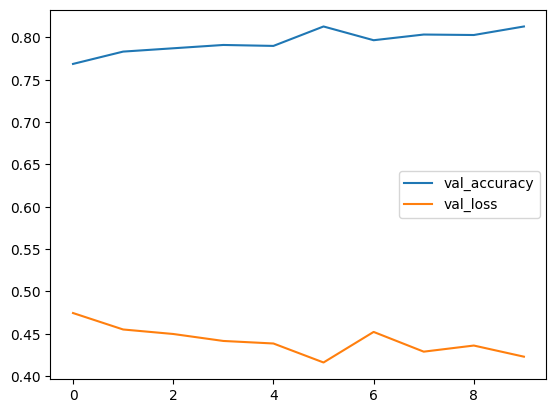

In [53]:
# Trace l'exactitude et la perte de validation au cours de l'entraînement
plt.plot(history_rnn.history['val_accuracy'], label='val_accuracy')
plt.plot(history_rnn.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [54]:
 # Fonction pour prédire le dépôt avec les nouvelles données et le modèle
def predict_deposit(new_data, model, model_columns):
    columns = ['age', 'job', 'marital', 'education', 'default','balance',
               'housing', 'loan', 'contact','day', 'month',
               'duration', 'campaign', 'pdays',
               'previous', 'poutcome']
    # Crée un DataFrame à partir des nouvelles données avec les colonnes spécifiées
    new_data_df = pd.DataFrame([new_data], columns=columns)
    # Applique un encodage one-hot sur les nouvelles données
    new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)
    # Charger les colonnes utilisées dans le modèle en "set" pour faciliser la comparaison
    model_columns_set = set(model_columns)

    # Supprimer les colonnes inconnues
    new_data_encoded = new_data_encoded.loc[:, new_data_encoded.columns.isin(model_columns_set)]

    # Ajouter les colonnes manquantes
    for col in model_columns:
        if col not in new_data_encoded.columns:
            new_data_encoded[col] = 0

    # Réordonner
    new_data_encoded = new_data_encoded[model_columns]

    # Prédiction
    prediction_prob = model.predict(new_data_encoded)[0][0]
    prediction = int(prediction_prob > 0.5)
    return prediction, prediction_prob


In [55]:

# 6. Exemple de prédiction

model_columns = pd.read_csv('model_columns.csv')['columns'].tolist()

new_data = [40, 'management', 'single', 'secondary', 'no', 200,'no', 'yes',
                   'cellular',12, 'may', 1042, 1, 2, 0, 'success']

prediction, probability = predict_deposit(new_data, model, model_columns)

print("Prediction:", "Deposit" if prediction == 1 else "No Deposit")
print("Deposit Probability:", round(probability, 4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Prediction: Deposit
Deposit Probability: 0.5013
